# Genetic Algorithm for Materials Science



<center><img src="https://miro.medium.com/v2/resize:fit:875/0*iacUogN9OLOqdPYY" alt="Drawing" style="width: 900px; height: 400px;" /></center>

<div style="text-align: right"> 
  <small>medium.com</small>
</div>

© 2023 [University of Illinois at Chicago](https://www.uic.edu/). All rights reserved.

# Learning Objectives


1. [Installations](#Installation)
2. [Basics of Genetic Algorithm](#Basics-of-Genetic-Algorithm)
3. [Using Genetic Algorithm to Optimize a Lennard-Jones System](#Using-Genetic-Algorithm-to-Optimize-a-Lennard-Jones-System)
4. [Genetic Algorithm for Crystal Structure Optimization](#Genetic-Algorithm-for-Crystal-Structure-Optimization)



## Installations

We will use pyGAD, a library for Genetic Algorithms, and [CASTING](https://doi.org/10.1038/s41524-023-01128-y), a package developed in our group for crystal structure prediction. We will also make use of some of the attributes of the CASTING package. The GitHub repository corresponding to CASTING can be found [here](https://github.com/sbanik2/CASTING).

In [1]:
# The potential file for crystal structure optimisation

import requests
url = "https://github.com/sbanik2/CASTING/raw/main/example/Au.eam"
r = requests.get(url, allow_redirects=True)
open('Au.eam', 'wb').write(r.content)

1790882

In [182]:
! pip install pygad
! pip install CASTING==0.1.3  #--no-dependencies

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


## Basics of Genetic Algorithm


Genetic Algorithms (GAs) are optimization algorithms inspired by the process of natural selection. They are used to find solutions to complex problems through an evolutionary approach.

#### Key Components

1. **Population:** A set of potential solutions or individuals.

2. **Genes:** Each individual in the population represents a potential solution and is encoded as a gene.

3. **Fitness Function:** A function that quantifies how good a solution is. It guides the selection process by assigning a fitness score to each individual.

4. **Selection:** Individuals with higher fitness scores have a higher chance of being selected as parents for the next generation. This mimics natural selection.

5. **Crossover:** The selected parents combine their chromosomes to create offspring. Crossover points are chosen to exchange genetic information.

6. **Mutation:** Random changes are introduced in some offspring's chromosomes to maintain diversity.

7. **Termination:** The algorithm stops when a termination condition is met, such as reaching a maximum number of generations or finding a satisfactory solution.



<center><img src="https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs42484-019-00003-8/MediaObjects/42484_2019_3_Fig3_HTML.png" alt="Drawing" style="width: 500px; height: 500px;" /></center>

<div style="text-align: right"> 
  <small>media.springernature.com</small>
</div>




#### Advantages

- Can handle complex, multi-dimensional search spaces.
- Effective for optimization and search problems.
- Finds global or near-global solutions in many cases.

#### Limitations

- Requires tuning of parameters such as population size, mutation rate, and crossover methods.
- May not guarantee the global optimal solution.
- Performance can be affected by the choice of representation and genetic operators.





### Using Genetic Algorithm to Optimize a Lennard-Jones System

The Lennard-Jones model describes how neutral atoms or molecules interact. At close distances, they're attracted, but if they get too close, they repel each other due to overlapping electron shells. This interplay can lead to molecule formation, and atoms can wiggle around when nudged because of these forces.


The lennard 12-6 jones equation!

$$
U(r) = 4 \varepsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$



<center><img src="https://www.researchgate.net/publication/341976308/figure/fig1/AS:904222463762434@1592594843591/Potential-Lennard-Jones-2_W640.jpg" alt="Drawing" style="width: 450px; height: 350px;" /></center>

<div style="text-align: right"> 
  <small>DOI: 10.1088/1742-6596/1491/1/012022</small>
</div>


In [2]:
import pygad
import numpy as np
import matplotlib.pyplot as plt

### First we generate data to fit to

In [3]:
epsilon = 10 # The actual solution we want to get
sigma = 4  # The actual solution we want to get

r = np.linspace(3,15,500)
U_lj_ref = 4*epsilon*((sigma/r)**12-(sigma/r)**6)


Text(0, 0.5, 'U')

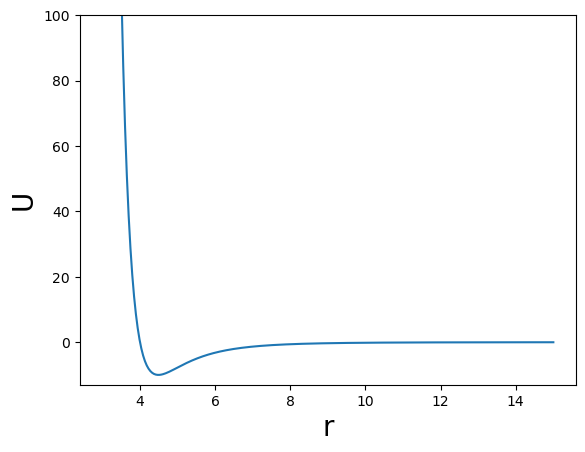

In [4]:
import matplotlib.pyplot as plt
plt.plot(r,U_lj_ref)
plt.ylim(-13,100)
plt.xlabel('r',size=20)
plt.ylabel('U',size=20)

### The fitness function

In [5]:
# here we want to reduce the mse error

def fitness_func(ga_instance, solution, solution_idx):
    sigma,epsilon = solution
    U_lj_calculated = 4*epsilon*((sigma/r)**12-(sigma/r)**6)
    mse = np.mean(U_lj_calculated-U_lj_ref)**2
    fitness = -mse
    return fitness

#### GA

In [6]:
function_inputs = [1,4]  # initial start [sigma,epsilon]
desired_output = 0 

In [7]:
fitness_function = fitness_func

num_generations = 100
num_parents_mating = 8

sol_per_pop = 20
num_genes = len(function_inputs)

init_range_low = [8,2]
init_range_high = [12,6]

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10
gene_space = [{'low': 8, 'high': 2}, {'low': 12, 'high': 6}]

In [8]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                      save_solutions=True,
                      gene_space=gene_space)

/global/cfs/cdirs/m3560/suvo/anaconda3/lib/python3.10/site-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
/global/cfs/cdirs/m3560/suvo/anaconda3/lib/python3.10/site-packages/pygad/pygad.py:1160: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  warnings.warn("Use the 'save_solutions' parameter with caution as it may cause memory ov

In [9]:
ga_instance.run()

In [10]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))


Parameters of the best solution : [4.04110031 8.52684164]
Fitness value of the best solution = -0.00010258548498178488


#### Search stats

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


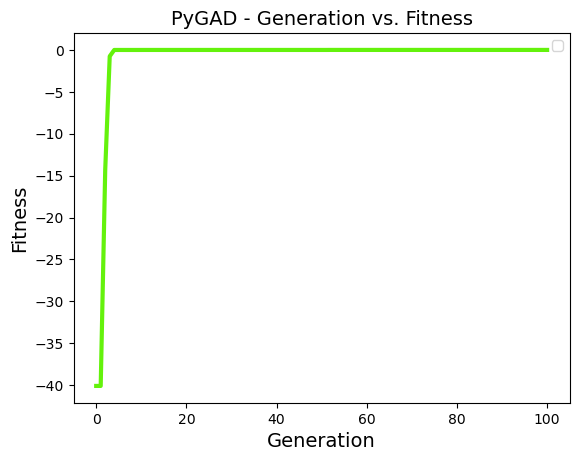

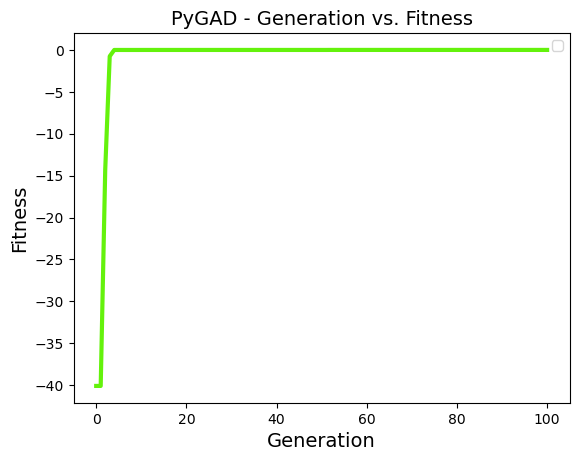

In [11]:
ga_instance.plot_fitness()

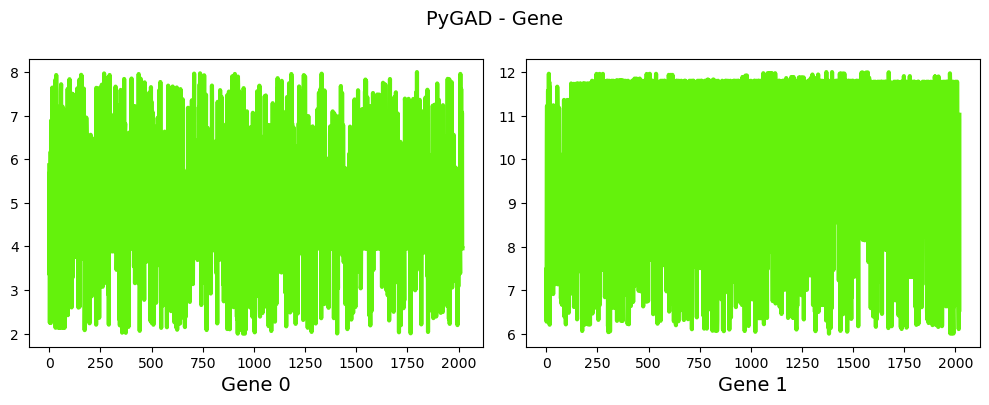

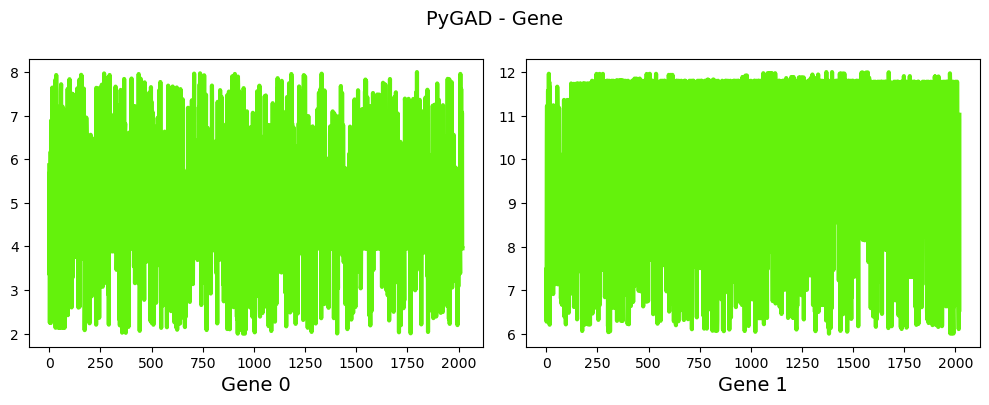

In [13]:
ga_instance.plot_genes()

#### Actual vs predicted

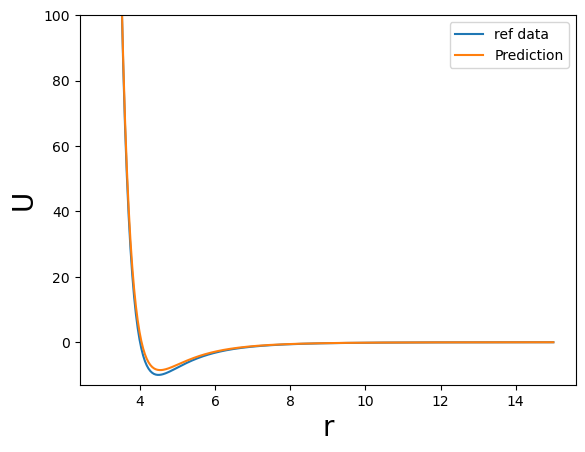

In [12]:
sigma_predicted =solution[0]
epsilon_predicted = solution[1]

U_lj_calculated = 4*epsilon_predicted*((sigma_predicted/r)**12-(sigma_predicted/r)**6)



plt.plot(r,U_lj_ref,label = 'ref data')
plt.plot(r,U_lj_calculated,label = 'Prediction')
plt.ylim(-13,100)
plt.xlabel('r',size=20)
plt.ylabel('U',size=20)
plt.legend()


## Genetic Algorithm for Crystal Structure Optimization

Crystal structure optimization is a technique for predicting new materials or crystals using optimization. We will perturb each coordinate of atoms, moving them around to find optimal arrangements that yield unique properties. Here, we will use a nanocluster of gold (13 atoms) and find its optimal position using a genetic algorithm.




<center><img src="https://github.com/sbanik2/CASTING/raw/main/figs/sutton_chen.gif" alt="Drawing" style="width: 200px; height: 200px;" /></center>

<div style="text-align: right"> 
  <small>https://github.com/sbanik2/CASTING</small>
</div>





In [13]:
import random
from CASTING.utilis import r_datafame,get_lattice
from CASTING.clusterfun import createRandomData
from CASTING.writer import StructureWriter
from pymatgen.io.vasp.inputs import Poscar
from CASTING.clusterfun import  parm2struc
from CASTING.aseEamEvaluate import AseEamEvaluator
from CASTING.perturb import perturbate
from CASTING.clusterfun import check_constrains

In [15]:
seed = 20

random.seed(seed)
np.random.seed(seed)

#### Define the system and constrains

In [16]:
r_min = {"Au-Au":2}
r_max = {"Au-Au":4}
box_dim = 50 # Make sure there is enough vaccum in the sides

#--------crystal constrains-----------

constrains = {
    "composition":{"Au":1},
    "atoms":13,
    "r_min":r_datafame(r_min),
    "r_max":r_datafame(r_max),
    "lattice":get_lattice(box_dim),  
    }


#-------------perturbation------------

pt = {
    'max_mutation': 0.05,  #Put in fraction of the box length 0.01 means 100*0.01 =1Angs
}


#-----------for energy evaluation--------------
    
ase_par = {
    'constrains':constrains,
    'par_file': "Au.eam", 
}

#### Generate initial random structure

In [17]:
init_data = createRandomData(constrains,multiplier= 10)
species = init_data['species']

#### Save a initial configuration in POSCAR format (use OVITO to visualize)



In [18]:
Poscar(parm2struc(init_data,constrains)).write_file('init.POSCAR')

#### Define calculators

In [19]:
perturb = perturbate(**pt).perturb
evaluator = AseEamEvaluator(**ase_par).evaluate

In [20]:
# We want to reduce energy

def fitness_func(ga_instance, solution, solution_idx):
    param = {'parameters':np.array(solution),'species':species}
    struct,energy = evaluator(param)
    #print(solution)
    if energy <0:
        print(energy)
    #print(check_constrains(param,constrains,verbose=True))
    return -energy


def mutate_fun(offspring, ga_instance):
    
    new_offspring = []
    for chromosome in offspring:
        param = {'parameters':np.array(chromosome),'species':species}
        newparam = perturb(param,8,0,12)
        struct,energy = evaluator(newparam)
        new_offspring.append(np.array(struct['parameters']))
    
   
    return np.array(new_offspring)



#### GA

In [21]:
fitness_function = fitness_func

num_generations = 1000
num_parents_mating = 1
initial_population = [createRandomData(constrains,multiplier= 10)['parameters'] for _ in range(6)]


parent_selection_type = "sss"
keep_parents = 1

crossover_type = None

mutation_type =  mutate_fun
mutation_percent_genes = 20
gene_space = [{'low': 0, 'high': 1} for _ in range(len(function_inputs))]



In [22]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       initial_population=initial_population,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_probability=0,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

In [23]:
ga_instance.run()

-41.47058610772855
-39.9311644134525
-41.17867496857482
-41.22109947613109
-41.17624560485598
-41.49099386217102
-41.46473139700671
-41.44526262357161
-41.45066380469882
-41.46890442503003
-41.49099399364148
-41.4909938923157
-41.49099400107326
-41.49099408919951
-41.53184063513896
-41.531840515341415
-41.531840402811746
-41.531839648963214
-41.53184001693612
-41.53184000220641
-41.40654096976428
-41.49627062462739
-41.53184055302243
-41.53184029269224
-41.531839788992
-41.53183856693339
-41.5318397597828
-41.53184048041169
-41.46082446336253
-41.531839570151064
-41.612441838341
-41.72038245967802
-41.7203826955941
-41.720382240829665
-41.72038202253877
-41.72038276937346
-41.72038244434869
-41.72038206512466
-41.660695703934636
-41.72038214348771
-41.720382755296455
-41.72038185967634
-41.72038261400341
-41.49700594194016
-41.61244077900718
-41.7203820210396
-41.76201979183388
-41.76202014899029
-41.79044196226813
-41.78492109689955
-41.78314012752766
-41.784919999744005
-41.790439669

KeyboardInterrupt: 

In [24]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Parameters of the best solution : [0.48048055 0.48129605 0.55779685 0.47982637 0.53305011 0.56742303
 0.44372204 0.51470024 0.48513273 0.43926144 0.51561889 0.53936208
 0.52602634 0.54241304 0.54618219 0.4480205  0.46958877 0.51534963
 0.50009003 0.45587466 0.51456582 0.53530691 0.49240944 0.53258688
 0.48861393 0.5134553  0.514994   0.52729851 0.48564923 0.47889261
 0.53526339 0.53506824 0.49521611 0.49308001 0.52470037 0.46243714
 0.47554421 0.474764   0.4695171 ]
Fitness value of the best solution = 41.79044226334187


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


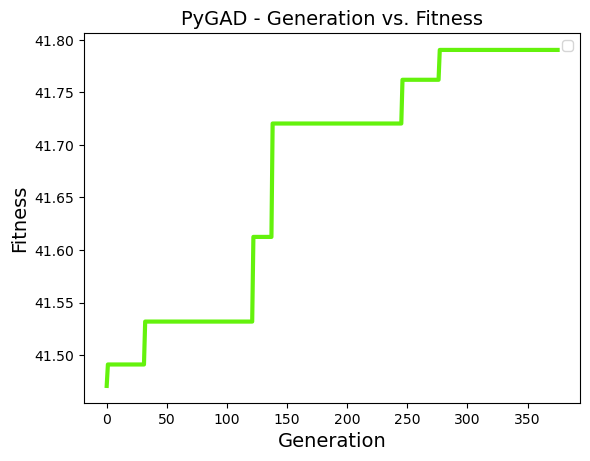

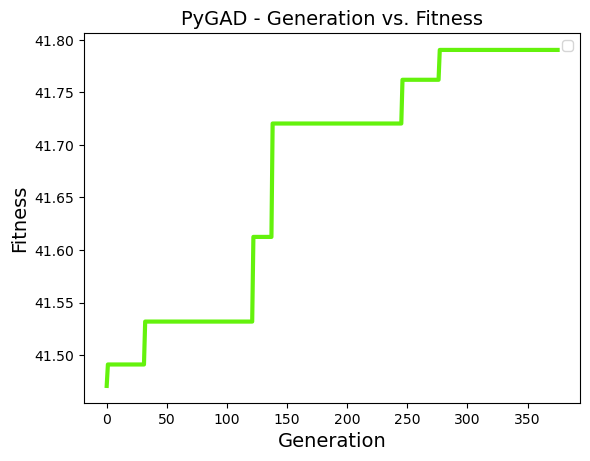

In [25]:
ga_instance.plot_fitness()

### write the final configuration


In [183]:

#write the final configuration
final_param = {'parameters':solution,'species':species}
Poscar(parm2struc(final_param,constrains)).write_file('final.POSCAR')

